1、在 Margin 区域内的样本点越多，则 Margin 区域越能够较好的表达样本数据点，此时，取 Margin 区域内中间的那条直线作为最终的模型；用该模型预测相应的样本点的 y 值；
2、在具体训练 SVM 算法模型解决回归问题时，提前指定 Margin 的大小，算法引入的超参数：ε，表示 Margin 区域的两条直线到区域中间的直线的距离，如图：
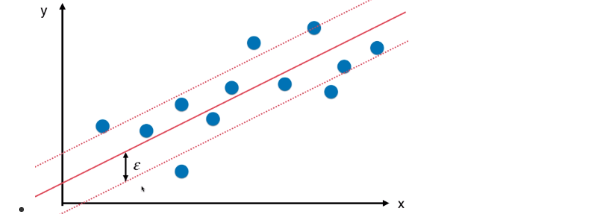

SVM 解决回归问题的思路与解决分类问题的思路相反，解决分类问题时，希望 Margin 区域内没有样本点或者样本点尽可能的少；
（1）LinearSVC、SVC、LinearSVR、SVR ：
（2）LinearSVC：使用线性 SVM 的思路解决分类问题；
（3）SVC：使用非线性 SVM 的思路解决分类问题；（多项式核、高斯核）
（4）LinearSVR：使用线性 SVM 的思路解决回归问题；
（5）SVR：使用非线性 SVM 的思路解决回归问题；（使用不同的核函数）

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

c:\users\administrator\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.svm import LinearSVR # 线性
from sklearn.svm import SVR #可以传入不同的核函数
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def stadardLinearSVR(epsilon=0.1):
    return Pipeline([
        ("std",StandardScaler()),
        ("lin",LinearSVR(epsilon=epsilon))
    ])

In [6]:
svr = stadardLinearSVR()
svr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin',
                 LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [7]:
svr.score(X_test, y_test)

0.6357629284489469